Multi-armed badit에서 여러 정책의 성능
- 초기탐험-후기탐사 
- $\epsilon$-greedy
- UCB

Q. $\epsilon = 0$일 때 $\epsilon$-greedy의 이익이 너무 높게 나타남. c=0인 UCS도 마찬가지로 높게 나옴. \
사실 rate = 0인 초기탐험-후기탐사 정책과 동일하므로, 즉 탐험 없은 탐사정책이므로 순이익이 낮게 나와야 함.  
A. visit 배열의 초기값을 1 대신 0으로 바꾸면 제대로 나옴

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_arms = 20
arm_prob = [0.4+(np.random.random()-0.5)/2 for i in range(num_arms)] # uniform over [0.15, 0.65]
num_pulls = 1000
num_runs = 50

print(arm_prob)

In [38]:
def simulate_pull_bandit(a, visit, win): # Simulate pulling the bandit arm
    visit[a] += 1 # Increment the number of visits for the selected arm
    win[a] += 1 if np.random.random() < arm_prob[a] else 0 # Increment the number of wins for the selected arm


In [39]:
def exploration_and_exploitation(rate):
    visit = np.zeros(num_arms)
    win = np.zeros(num_arms)

    # exploration
    for t in range(int(num_pulls * rate)):
        a = np.random.randint(num_arms)
        simulate_pull_bandit(a, visit, win)

    # exploitation
    q = np.array([win[i]/visit[i] if visit[i] > 0 else 0 for i in range(num_arms)]) # action-value estimates
    a = np.random.choice(np.where(q==np.max(q))[0]) # greedy action with tie-breaking
    for t in range(num_pulls - int(num_pulls * rate)):
        simulate_pull_bandit(a, visit, win)
    return visit, win

exploration_and_exploitation(0)


(array([   0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([  0.,   0., 549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]))

In [40]:
def epsilon_greedy(epsilon):
    visit = np.zeros(num_arms)
    win = np.zeros(num_arms)
    for t in range(num_pulls):
        if np.random.random() < epsilon: # exploration
            h = np.random.randint(0,num_arms) # random action
        else: # exploitation
            p = np.array([win[i] / visit[i] if visit[i] > 0 else 0 for i in range(num_arms)]) # action-value estimates
            h = np.random.choice(np.where(p==np.max(p))[0]) # greedy action with tie-breaking
        simulate_pull_bandit(h, visit, win) # simulate pulling the selected arm
    return visit, win

epsilon_greedy(0)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0., 999.,   0.,   0.,   0.,   0.]),
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 243.,   0.,   0.,   0.,   0.]))

In [43]:
def UCB(c):
    visit = np.zeros(num_arms)
    win = np.zeros(num_arms)
    for t in range(num_pulls):
        p = np.array([win[i]/visit[i] + c * np.sqrt(np.log(t+1)/visit[i]) if visit[i] > 0 else np.inf for i in range(num_arms)])
        h = np.random.choice(np.where(p==np.max(p))[0])
        simulate_pull_bandit(h, visit, win)
    return visit, win

UCB(0)

(array([  1.,   2.,   2.,   2.,   1.,   1.,   1.,   1.,   8., 970.,   1.,
          1.,   1.,   2.,   1.,   1.,   1.,   1.,   1.,   1.]),
 array([  0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   4., 582.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]))

UCB: [ 139.44  145.6   159.4   149.4   142.72  134.68  -14.76 -139.96]


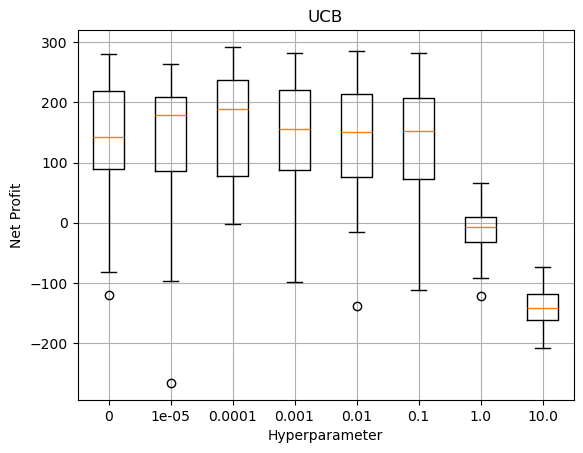

In [42]:
def box_plot_analysis(algorithm, hyper_param, alg_name):
    net_profit = []
    for param in hyper_param:
        net = []
        for k in range(num_runs):
            visit, win = algorithm(param)
            net.append(sum([2*win[i]-visit[i] for i in range(num_arms)]))
        net_profit.append(net)
    print(alg_name+':',np.mean(net_profit, axis=1))

    plt.boxplot(net_profit)
    plt.title(alg_name)
    plt.xlabel('Hyperparameter')
    plt.ylabel('Net Profit')
    plt.grid()
    plt.xticks(ticks=range(1, len(hyper_param)+1), labels=hyper_param)
    plt.show()

#box_plot_analysis(exploration_and_exploitation, [0.0,0.1,0.25,0.5,0.75,0.99,1.0], 'Exploration and Exploitation')
#box_plot_analysis(epsilon_greedy, [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 'Epsilon-Greedy')
box_plot_analysis(UCB, [0,0.00001,0.0001,0.001,0.01,0.1,1.0,10.0], 'UCB')